In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [2]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

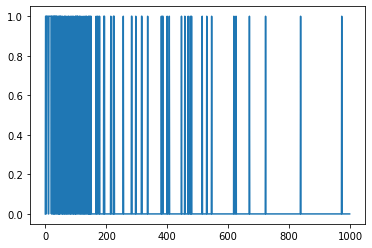

In [3]:
plt.plot(train_data[0])

In [4]:
baseline_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16016     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.6210 - accuracy: 0.6802 - binary_crossentropy: 0.6210 - val_loss: 0.4876 - val_accuracy: 0.8024 - val_binary_crossentropy: 0.4876
Epoch 2/20
49/49 - 0s - loss: 0.3988 - accuracy: 0.8361 - binary_crossentropy: 0.3988 - val_loss: 0.3573 - val_accuracy: 0.8505 - val_binary_crossentropy: 0.3573
Epoch 3/20
49/49 - 0s - loss: 0.3297 - accuracy: 0.8654 - binary_crossentropy: 0.3297 - val_loss: 0.3341 - val_accuracy: 0.8600 - val_binary_crossentropy: 0.3341
Epoch 4/20
49/49 - 0s - loss: 0.3111 - accuracy: 0.8709 - binary_crossentropy: 0.3111 - val_loss: 0.3284 - val_accuracy: 0.8609 - val_binary_crossentropy: 0.3284
Epoch 5/20
49/49 - 0s - loss: 0.3039 - accuracy: 0.8748 - binary_crossentropy: 0.3039 - val_loss: 0.3309 - val_accuracy: 0.8582 - val_binary_crossentropy: 0.3309
Epoch 6/20
49/49 - 0s - loss: 0.2987 - accuracy: 0.8764 - binary_crossentropy: 0.2987 - val_loss: 0.3271 - val_accuracy: 0.8604 - val_binary_crossentropy: 0.3271
Epoch 7/20
49/49 - 0s - loss

In [6]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6590 - accuracy: 0.6365 - binary_crossentropy: 0.6590 - val_loss: 0.6135 - val_accuracy: 0.7366 - val_binary_crossentropy: 0.6135
Epoch 2/20
49/49 - 0s - loss: 0.5615 - accuracy: 0.7823 - binary_crossentropy: 0.5615 - val_loss: 0.5129 - val_accuracy: 0.8141 - val_binary_crossentropy: 0.5129
Epoch 3/20
49/49 - 0s - loss: 0.4602 - accuracy: 0.8356 - binary_crossentropy: 0.4602 - val_loss: 0.4221 - val_accuracy: 0.8450 - val_binary_crossentropy: 0.4221
Epoch 4/20
49/49 - 0s - loss: 0.3832 - accuracy: 0.8594 - binary_crossentropy: 0.3832 - val_loss: 0.3700 - val_accuracy: 0.8558 - val_binary_crossentropy: 0.3700
Epoch 5/20
49/49 - 0s - loss: 0.3433 - accuracy: 0.8680 - binary_crossentropy: 0.3433 - val_loss: 0.3469 - val_accuracy: 0.8586 - val_binary_crossentropy: 0.3469
Epoch 6/20
49/49 - 0s - loss: 0.3240 - accuracy: 0.8725 - binary_crossentropy: 0.3240 - val_loss: 0.3366 - val_accuracy: 0.8602 - val_binary_crossentropy: 0.3366
Epoch 7/20
49/49 - 0s - loss

In [8]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.4377 - accuracy: 0.7917 - binary_crossentropy: 0.4377 - val_loss: 0.3489 - val_accuracy: 0.8494 - val_binary_crossentropy: 0.3489
Epoch 2/20
49/49 - 0s - loss: 0.2941 - accuracy: 0.8784 - binary_crossentropy: 0.2941 - val_loss: 0.3284 - val_accuracy: 0.8571 - val_binary_crossentropy: 0.3284
Epoch 3/20
49/49 - 0s - loss: 0.2271 - accuracy: 0.9098 - binary_crossentropy: 0.2271 - val_loss: 0.3425 - val_accuracy: 0.8519 - val_binary_crossentropy: 0.3425
Epoch 4/20
49/49 - 0s - loss: 0.1125 - accuracy: 0.9643 - binary_crossentropy: 0.1125 - val_loss: 0.4441 - val_accuracy: 0.8424 - val_binary_crossentropy: 0.4441
Epoch 5/20
49/49 - 0s - loss: 0.0250 - accuracy: 0.9960 - binary_crossentropy: 0.0250 - val_loss: 0.5287 - val_accuracy: 0.8499 - val_binary_crossentropy: 0.5287
Epoch 6/20
49/49 - 0s - loss: 0.0053 - accuracy: 0.9997 - binary_crossentropy: 0.0053 - val_loss: 0.6134 - val_accuracy: 0.8523 - val_binary_crossentropy: 0.6134
Epoch 7/20
49/49 - 0s - loss

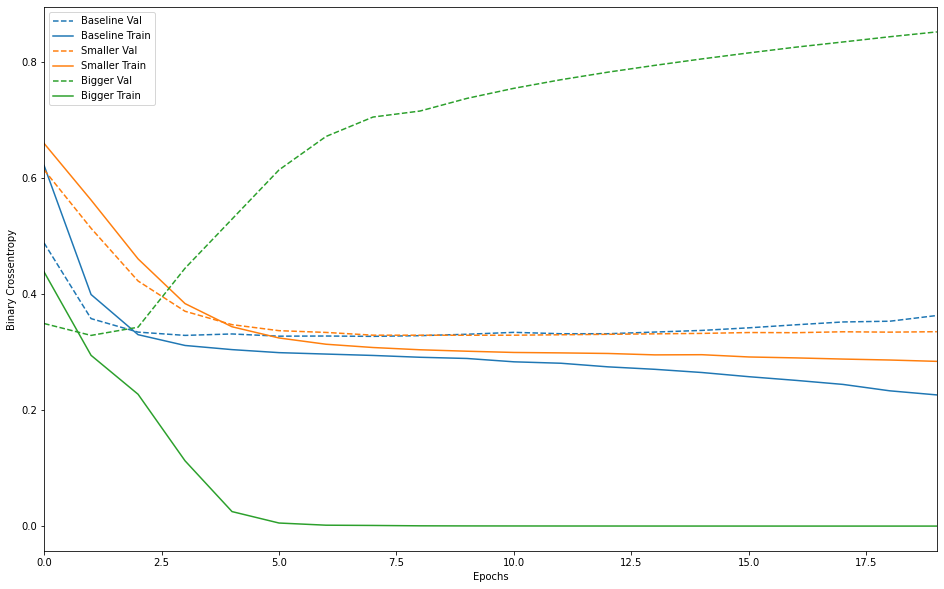

In [10]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [11]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.5913 - accuracy: 0.7346 - binary_crossentropy: 0.5443 - val_loss: 0.4499 - val_accuracy: 0.8328 - val_binary_crossentropy: 0.4032
Epoch 2/20
49/49 - 0s - loss: 0.4033 - accuracy: 0.8519 - binary_crossentropy: 0.3565 - val_loss: 0.3861 - val_accuracy: 0.8562 - val_binary_crossentropy: 0.3398
Epoch 3/20
49/49 - 0s - loss: 0.3668 - accuracy: 0.8671 - binary_crossentropy: 0.3213 - val_loss: 0.3797 - val_accuracy: 0.8570 - val_binary_crossentropy: 0.3352
Epoch 4/20
49/49 - 0s - loss: 0.3555 - accuracy: 0.8710 - binary_crossentropy: 0.3118 - val_loss: 0.3764 - val_accuracy: 0.8582 - val_binary_crossentropy: 0.3338
Epoch 5/20
49/49 - 0s - loss: 0.3498 - accuracy: 0.8729 - binary_crossentropy: 0.3080 - val_loss: 0.3678 - val_accuracy: 0.8606 - val_binary_crossentropy: 0.3269
Epoch 6/20
49/49 - 0s - loss: 0.3433 - accuracy: 0.8749 - binary_crossentropy: 0.3032 - val_loss: 0.3671 - val_accuracy: 0.8608 - val_binary_crossentropy: 0.3279
Epoch 7/20
49/49 - 0s - loss

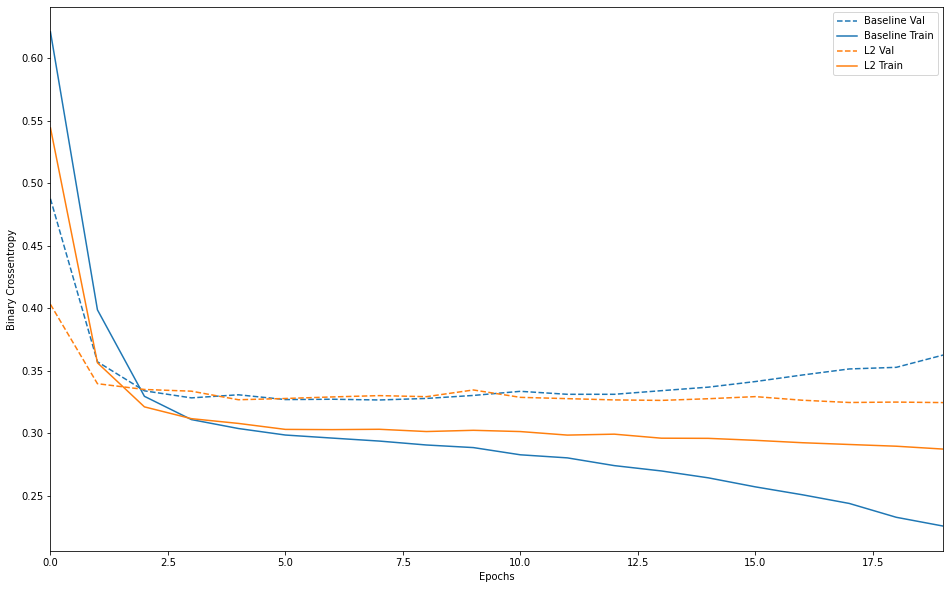

In [12]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [13]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6761 - accuracy: 0.5588 - binary_crossentropy: 0.6761 - val_loss: 0.5996 - val_accuracy: 0.7613 - val_binary_crossentropy: 0.5996
Epoch 2/20
49/49 - 0s - loss: 0.5776 - accuracy: 0.6918 - binary_crossentropy: 0.5776 - val_loss: 0.4644 - val_accuracy: 0.8218 - val_binary_crossentropy: 0.4644
Epoch 3/20
49/49 - 0s - loss: 0.4885 - accuracy: 0.7740 - binary_crossentropy: 0.4885 - val_loss: 0.3842 - val_accuracy: 0.8468 - val_binary_crossentropy: 0.3842
Epoch 4/20
49/49 - 0s - loss: 0.4299 - accuracy: 0.8118 - binary_crossentropy: 0.4299 - val_loss: 0.3504 - val_accuracy: 0.8553 - val_binary_crossentropy: 0.3504
Epoch 5/20
49/49 - 0s - loss: 0.4017 - accuracy: 0.8334 - binary_crossentropy: 0.4017 - val_loss: 0.3371 - val_accuracy: 0.8581 - val_binary_crossentropy: 0.3371
Epoch 6/20
49/49 - 0s - loss: 0.3841 - accuracy: 0.8431 - binary_crossentropy: 0.3841 - val_loss: 0.3288 - val_accuracy: 0.8588 - val_binary_crossentropy: 0.3288
Epoch 7/20
49/49 - 0s - loss

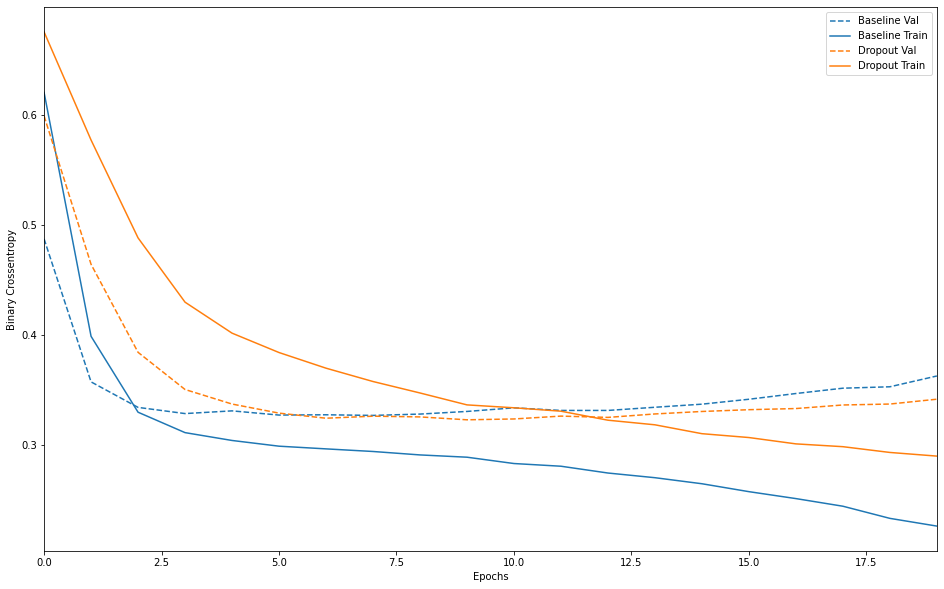

In [14]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])